In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
lag = 10

In [3]:
def Sigmoid(x):
    return (1.0 / (1.0 + np.exp(-x)))

In [4]:
data = pd.read_csv('traffic speed.csv')
print(data.shape)


(722789, 9)


In [5]:
arr = np.array(data)
print(arr.shape)

(722789, 9)


In [6]:
train = arr[:700000,0:9]
test = arr[700001:,0:9]
print(train.shape)
print(test.shape)

(700000, 9)
(22788, 9)


In [7]:
#train 데이터를 3D(9겹) array로 만들기
train_arr = []
for i in range(9):
    train_arr.append(train[i:i-lag,:])

train_arr = np.array(train_arr, dtype=np.float32)
print(train_arr.shape)

(9, 699990, 9)


In [8]:
x_train_val = np.concatenate((train_arr[0], train_arr[1], train_arr[2], train_arr[3], train_arr[4], train_arr[5], train_arr[6], train_arr[7], train_arr[8]), axis=1).reshape(-1, 9, 9)
#train_mean, train_std = np.mean(x_train_val, axis=0), np.std(x_train_val, axis=0)
#train_mean, train_std = np.mean(train_mean, axis=0), np.mean(train_std, axis=0)

In [9]:
#x_train_val = (x_train_val - train_mean) / (2 * train_std)
#x_train_val = Sigmoid(x_train_val)

In [10]:
x_train_val

array([[[2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         8.0000001e-01, 1.0174000e+02,           nan],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         6.9999999e-01, 1.0623000e+02, 4.9000001e+00],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         1.0000000e-01, 8.9169998e+01, 3.4400002e+01],
        ...,
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         8.9999998e-01, 1.0289000e+02, 2.0000000e+01],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         2.0000000e-01, 1.0468000e+02, 9.6300003e+01],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         6.9999999e-01, 8.2699997e+01, 1.6500000e+01]],

       [[2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         6.9999999e-01, 1.0623000e+02, 4.9000001e+00],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         1.0000000e-01, 8.9169998e+01, 3.4400002e+01],
        [2.0190100e+16, 1.0000000e+00, 1.0000000e+00, ...,
         5.000

In [11]:
y_train_val = train[lag:, 7:8]
#y_train_val = (y_train_val - train_mean) / (2 * train_std)
#y_train_val = Sigmoid(y_train_val)

print(x_train_val.shape, y_train_val.shape)
y_train_val

(699990, 9, 9) (699990, 1)


array([[121.73],
       [ 97.57],
       [ 99.21],
       ...,
       [ 75.49],
       [ 71.66],
       [ 71.39]])

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(559992, 9, 9) (559992, 1) (139998, 9, 9) (139998, 1)


In [13]:
test_arr = []
for i in range(9):
    test_arr.append(test[i:i-lag,:])

test_arr = np.array(test_arr, dtype=np.float32)
print(test_arr.shape)

(9, 22778, 9)


In [14]:
x_test = np.concatenate((test_arr[0], test_arr[1], test_arr[2], test_arr[3], test_arr[4], test_arr[5], test_arr[6], test_arr[7], test_arr[8]), axis=1).reshape(-1, 9, 9)
print(x_test.shape)
x_test

(22778, 9, 9)


array([[[2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         8.9999998e-01, 7.6849998e+01, 2.8000000e+00],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         8.9999998e-01, 8.0360001e+01, 3.0000000e+00],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         6.0000002e-01, 8.0379997e+01, 6.9999999e-01],
        ...,
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         6.0000002e-01, 1.1208000e+02, 6.0999999e+00],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         4.0000001e-01, 9.7889999e+01, 1.0800000e+01],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         1.0000000e-01, 8.3559998e+01, 3.7000000e+00]],

       [[2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         8.9999998e-01, 8.0360001e+01, 3.0000000e+00],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         6.0000002e-01, 8.0379997e+01, 6.9999999e-01],
        [2.0190227e+16, 2.0000000e+00, 2.7000000e+01, ...,
         8.999

In [15]:
y_test = test[lag:, 7:8]
print(y_test.shape)
y_test

(22778, 1)


array([[104.29],
       [ 92.23],
       [ 85.97],
       ...,
       [ 89.87],
       [114.23],
       [114.66]])

In [16]:
h_units = 32
activation_ = 'softmax'

def rnn_model():
    model = Sequential()
    
    model.add(LSTM(units=h_units, return_sequences=False, input_shape=(9, 9)))   
    #model.add(LSTM(units=h_units, return_sequences=False))
    model.add(Dense(64))
    
    model.add(Dense(1))
    
    return model

In [17]:
# create a model 
model = rnn_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,553
Trainable params: 7,553
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [19]:
# training
tensorBoard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

#hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True, callbacks=[tensorBoard])

hist = model.fit(x_train, y_train,
                 batch_size=2048,
                 epochs=10,
                 verbose=1, 
                 validation_data=(x_val, y_val))
#hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 559992 samples, validate on 139998 samples
Epoch 1/10
413696/559992 [=====================>........] - ETA: 1s - loss: nan - acc: 2.4172e-06

KeyboardInterrupt: 

In [112]:
y_pred = model.predict(x_test, batch_size=1024, verbose=True) 
print(y_pred.shape)
print(model.evaluate(x_test, y_test,batch_size=1024))

22778/22778 [==============================] - 1s 27us/step
(22778, 1)
22778/22778 [==============================] - 0s 18us/step
[117.4609476434974, 0.0003951180964088155]


In [113]:
y_pred

array([[95.12637],
       [95.12637],
       [95.12637],
       ...,
       [95.12637],
       [95.12637],
       [95.12637]], dtype=float32)

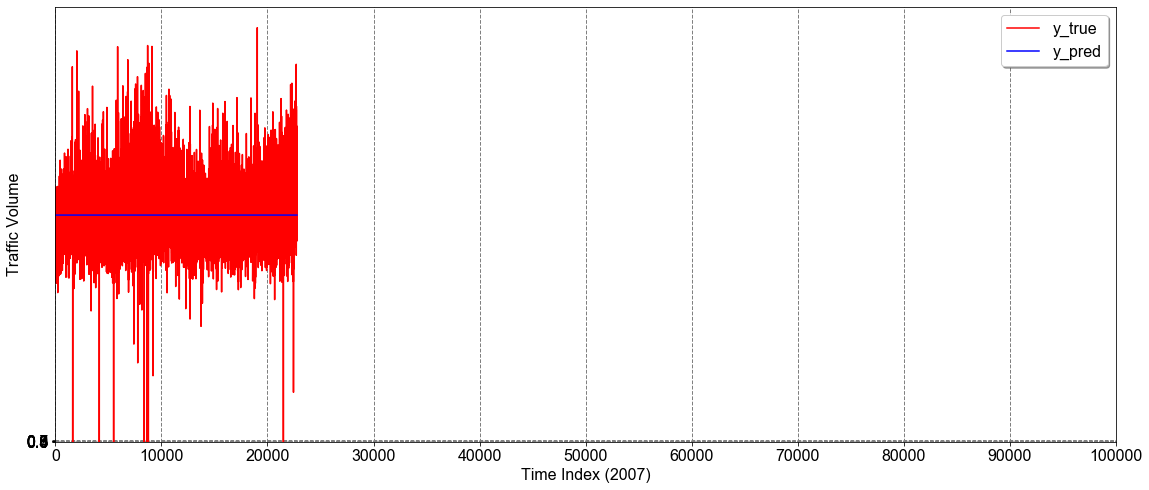

In [114]:
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,], 'r', label='y_true')
plt.plot(y_pred[:,], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index (2007)')
plt.ylabel('Traffic Volume')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0.3) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,105082,10000))
plt.yticks(np.arange(0.3,1.0,0.1))

# save & display figure
plt.show()
